<a href="https://colab.research.google.com/github/Thavisha72/Iris-Flower-Classification-/blob/main/Iris_Flower_Classification(TASK_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

# Project Summery

Project Description:

The Iris Flower Classification project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements. Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

Objective:

The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. The model aims to automate the classification process, offering a practical solution for identifying iris species.

Key Project Details:

Iris flowers have three species: setosa, versicolor, and virginica.These species can be distinguished based on measurements such as sepal length, sepal width, petal length, and petal width.The project involves training a machine learning model on a dataset that contains iris flower measurements associated with their respective species.

##  Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("https://raw.githubusercontent.com/Thavisha72/Iris-Flower-Classification-/refs/heads/main/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data preprocessing

In [ ]:
#columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#cheking for NULL values
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#Calculate duplicates
df.duplicated().sum()

0

In [ ]:
#removing the first column
df.drop('Id',axis=1,inplace=True)


In [ ]:
#Changing Column names
df.columns = ['SepalLength (cm)', 'SepalWidth (cm)', 'PetalLength (Cm)', 'PetalWidth (Cm)',
       'Species']
df.columns

Index(['SepalLength (cm)', 'SepalWidth (cm)', 'PetalLength (Cm)',
       'PetalWidth (Cm)', 'Species'],
      dtype='object')

## Analyze and visualize the dataset


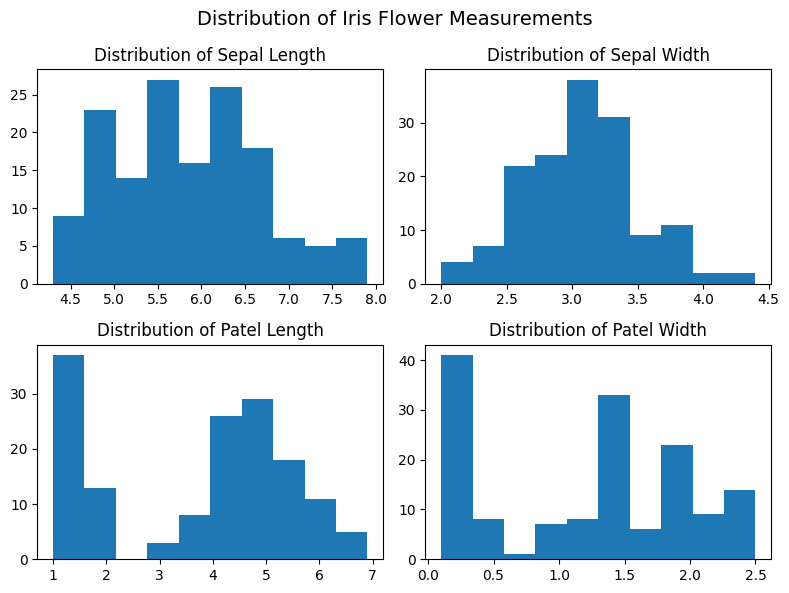

In [ ]:
#distribution of Iris Flower Measurements

plt.figure(figsize= (8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

#plot 1 Sepal Length
plt.subplot(2,2,1)
plt.hist(df['SepalLength (cm)'])
plt.title('Distribution of Sepal Length')

#plot 2 Sepal Width
plt.subplot(2,2,2)
plt.hist(df['SepalWidth (cm)'])
plt.title('Distribution of Sepal Width')

#plot 3 Patel Length
plt.subplot(2,2,3)
plt.hist(df['PetalLength (Cm)'])
plt.title('Distribution of Patel Length')

#plot 4 Patel Width
plt.subplot(2,2,4)
plt.hist(df['PetalWidth (Cm)'])
plt.title('Distribution of Patel Width')

plt.tight_layout()
plt.show()



####Sepal Length vs Sepal Width

In [ ]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

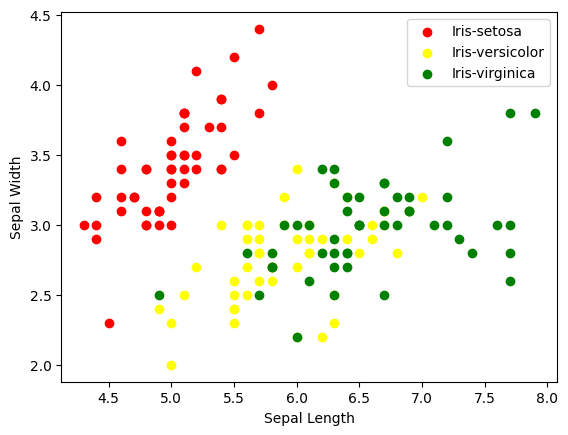

In [ ]:
#Scatter plot visualization code for Sepal Length vs Sepal Width.
for i in range(3):
    # Select data for the current species.
    x = df[df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLength (cm)'], x['SepalWidth (cm)'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

####Petal Length vs Petal Width

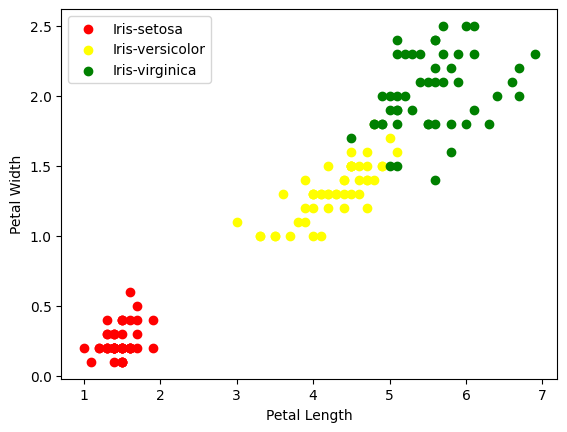

In [ ]:
#Scatter plot visualization code for Petal Length vs Petal Width.
for i in range(3):
    # Select data for the current species.
    x = df[df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLength (Cm)'], x['PetalWidth (Cm)'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Sepal Length vs Petal Length

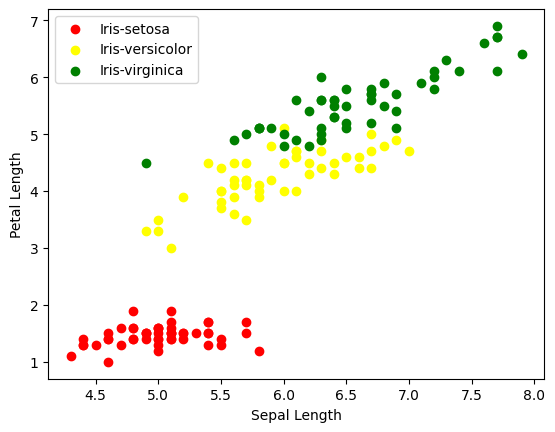

In [ ]:
#Scatter plot visualization code for Sepal Length vs Petal Length.
for i in range(3):
    # Select data for the current species.
    x = df[df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLength (cm)'], x['PetalLength (Cm)'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Sepal Width vs Petal Width

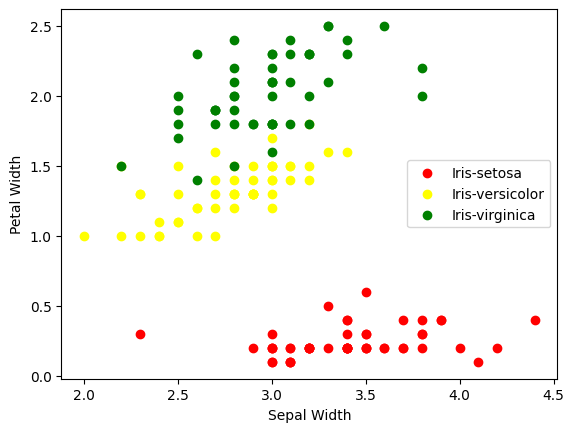

In [ ]:
#Scatter plot visualization code for Sepal Width vs Petal Width.
for i in range(3):
    # Select data for the current species.
    x = df[df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidth (cm)'], x['PetalWidth (Cm)'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Heat map for identify correlation between variables

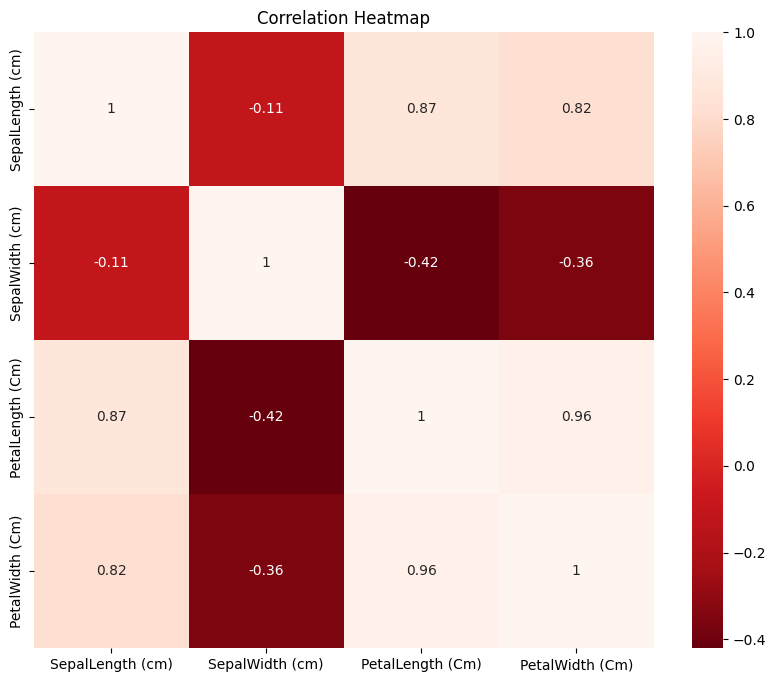

In [ ]:
#Heat map for identify correlation between variables

plt.figure(figsize = (10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='Reds_r')
plt.title('Correlation Heatmap')
plt.show()


## Feature engineering

**Categorical** **Encoding**

In [ ]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
df['Species'] = le.fit_transform(df['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = df['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


**Data splitting And Scalling**

In [ ]:
x = df.drop("Species", axis=1)
y = df["Species"]
#split data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

## Building the ML model

### Linear Regression

**Model Training**

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Applying the modet to make predicions**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

## Model Evaluation.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)

LR MSE (Train): 0.04916693786348207
LR R2 (Train): 0.9223339287808093
LR MSE (Test): 0.036234680547680705
LR R2 (Test): 0.9544536138367142


In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.049167,0.922334,0.036235,0.954454


## Testing the model.

# Conclusion